# **Air Quality**

In [240]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
plt.style.use('fivethirtyeight')


In [241]:
df =  pd.read_csv(r'C:\Users\prate\OneDrive\Documents\Air Quality\3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69.csv')

In [242]:
df.head()

,id,country,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,pollutant_unit
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-03-2023 21:00:00,PM2.5,8.0,38.0,24.0,NaN
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-03-2023 21:00:00,PM10,18.0,44.0,31.0,NaN
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-03-2023 21:00:00,NO2,5.0,14.0,9.0,NaN
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-03-2023 21:00:00,NH3,4.0,5.0,4.0,NaN
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-03-2023 21:00:00,SO2,4.0,26.0,13.0,NaN


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2713 non-null   int64  
 1   country         2713 non-null   object 
 2   state           2713 non-null   object 
 3   city            2713 non-null   object 
 4   station         2713 non-null   object 
 5   last_update     2713 non-null   object 
 6   pollutant_id    2713 non-null   object 
 7   pollutant_min   2421 non-null   float64
 8   pollutant_max   2421 non-null   float64
 9   pollutant_avg   2421 non-null   float64
 10  pollutant_unit  0 non-null      float64
dtypes: float64(4), int64(1), object(6)
memory usage: 233.3+ KB


In [244]:
df.describe()

,id,pollutant_min,pollutant_max,pollutant_avg,pollutant_unit
count,2713.000000,2421.000000,2421.000000,2421.000000,0.0
mean,1357.000000,17.606361,63.501859,34.792235,NaN
std,783.319964,18.701923,69.062941,30.579246,NaN
min,1.000000,1.000000,1.000000,1.000000,NaN
25%,679.000000,5.000000,18.000000,12.000000,NaN
50%,1357.000000,12.000000,46.000000,27.000000,NaN
75%,2035.000000,24.000000,86.000000,50.000000,NaN
max,2713.000000,215.000000,500.000000,274.000000,NaN


In [245]:
df.columns

Index(['id', 'country', 'state', 'city', 'station', 'last_update',
       'pollutant_id', 'pollutant_min', 'pollutant_max', 'pollutant_avg',
       'pollutant_unit'],
      dtype='object')

In [246]:
df.shape

(2713, 11)

#### **1. Making Dummy Table**

In [247]:
da = df.copy()

#### **2. Missing Values**

In [248]:
da.isna().sum()

id                   0
country              0
state                0
city                 0
station              0
last_update          0
pollutant_id         0
pollutant_min      292
pollutant_max      292
pollutant_avg      292
pollutant_unit    2713
dtype: int64

In [249]:
# Dropping column pollutant_unit column becoz it has all NA values
da = da.drop(columns='pollutant_unit',axis=1 )

In [250]:
# Dropping the column of min and max 
da = da.drop(columns=['pollutant_min','pollutant_max'])

<AxesSubplot: xlabel='pollutant_avg', ylabel='Density'>

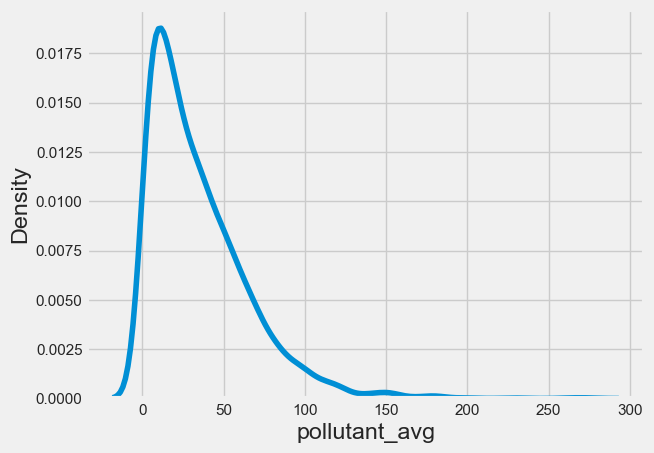

In [251]:
sns.kdeplot(df['pollutant_avg'])

In [252]:
# Dropping Null values
da = da.dropna()

In [253]:
da.isna().sum()

id               0
country          0
state            0
city             0
station          0
last_update      0
pollutant_id     0
pollutant_avg    0
dtype: int64

#### **3. Duplicate Values**

In [254]:
da.duplicated().value_counts() 
#There are no Duplicate Values

False    2421
dtype: int64

#### **4. Outliners**

<AxesSubplot: xlabel='pollutant_avg'>

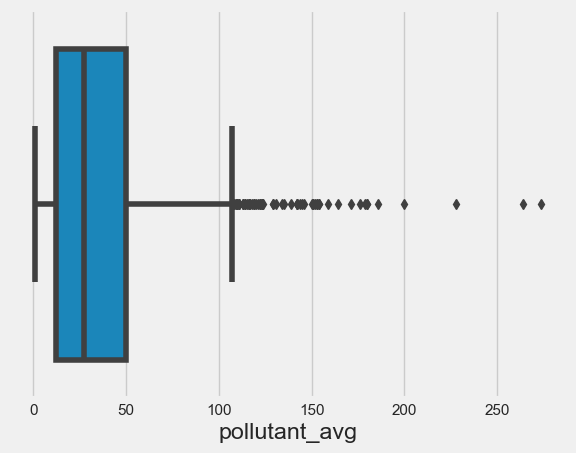

In [255]:
sns.boxplot(x = da['pollutant_avg'])
# I am keeping it because there might be some states which have very high pollution

#### **5. Data Reduction**

In [256]:
da = da.drop(columns= 'country', axis=1)

In [257]:
da = da.drop(columns= 'last_update', axis=1)

In [258]:
da = da.drop(columns= 'station', axis=1)

In [259]:
da = da.drop(columns= 'id', axis=1)

#### **6. Data Visualisation**

### **QUESTIONS**
- Which are the top most polluted states?
- Which are the top least polluted states?
- Which are the top most polluted cities?
- Which are the top least polluted cities?
- Statewise most polluted city?

#### **Which are the top most polluted states?**


In [260]:
#Calculate the average pollution value of all the cities in the state.
da_states = da.groupby('state')['pollutant_avg'].mean().sort_values(ascending=False)
da_states = da_states.apply(lambda x : round(x))
da_states = da_states[:10]

da_states = da_states.rename_axis('states').reset_index()
da_states['pollutant_avg'] = pd.to_numeric(da_states['pollutant_avg'], errors='coerce')


Text(0.5, 1.0, 'Top most polluted states')

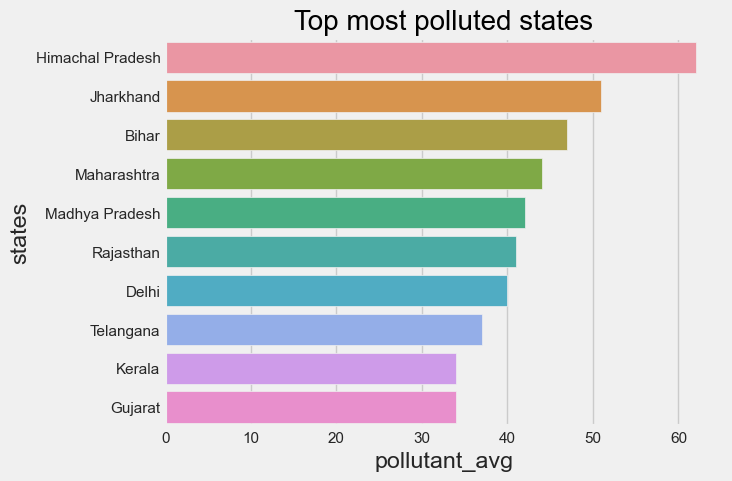

In [261]:
sns.barplot(
    x='pollutant_avg', 
    y='states', 
    data=da_states 
    )
plt.title(label="Top most polluted states",
          fontsize=20,
          color="black")


#### **Which are the top least polluted states?**

In [262]:
#Calculate the average pollution value of all the cities in the state.
daa_states = da.groupby('state')['pollutant_avg'].mean().sort_values(ascending=True)
daa_states = daa_states.apply(lambda x : round(x))
daa_states = daa_states[:10]

daa_states = daa_states.rename_axis('states').reset_index()
daa_states['pollutant_avg'] = pd.to_numeric(daa_states['pollutant_avg'], errors='coerce')

Text(0.5, 1.0, 'Top least polluted states')

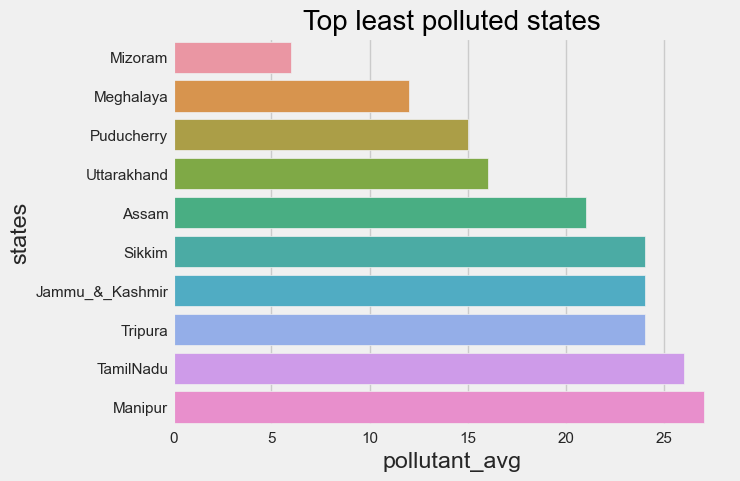

In [263]:
sns.barplot(
    x='pollutant_avg', 
    y='states', 
    data=daa_states 
    )
plt.title(label="Top least polluted states",
          fontsize=20,
          color="black")


#### **Which are the top most polluted cities?**

In [264]:
da_cities = da.groupby('city')['pollutant_avg'].mean().sort_values(ascending=True)
da_cities = da_cities.apply(lambda x : round(x))
da_cities = da_cities.rename_axis('city').reset_index()
da_cities['pollutant_avg'] = pd.to_numeric(da_cities['pollutant_avg'], errors='coerce')
da_city_l = da_cities.sort_values('pollutant_avg',ascending=False)
da_city_l = da_city_l[:4]

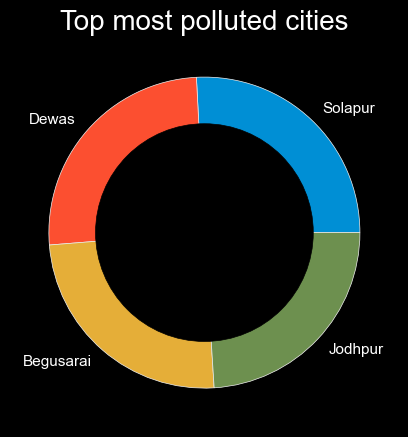

In [265]:
fig = plt.figure()
fig.patch.set_facecolor('black')
 
# Change color of text
plt.rcParams['text.color'] = 'white'
 
# Create a circle at the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='black')
 
# Pieplot + circle on it
plt.title(label="Top most polluted cities",
          fontsize=20,
          color="white")
plt.pie(da_city_l['pollutant_avg'], labels=da_city_l['city'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


#### **Which are the top least polluted cities?**

In [266]:
da_city = da_cities[:4]

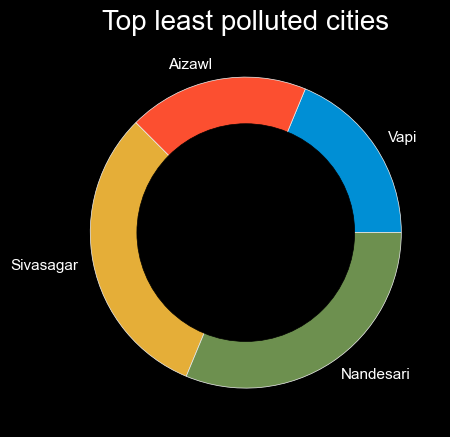

In [267]:
fig = plt.figure()
fig.patch.set_facecolor('black')
 
# Change color of text
plt.rcParams['text.color'] = 'white'
 
# Create a circle at the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='black')
 
# Pieplot + circle on it
plt.title(label="Top least polluted cities",
          fontsize=20,
          color="white")
plt.pie(da_city['pollutant_avg'], labels=da_city['city'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### **Statewise most polluted city?**

In [268]:
das = da.groupby('state').apply(lambda x: x.loc[x['pollutant_avg'].idxmax(), ['city', 'pollutant_avg']])
das.reset_index()
da_sort = das.sort_values('pollutant_avg',ascending=True)
da_sort = da_sort.reset_index()
da_sort.shape

(30, 3)

Text(0.5, 1.0, 'Statewise most polluted city')

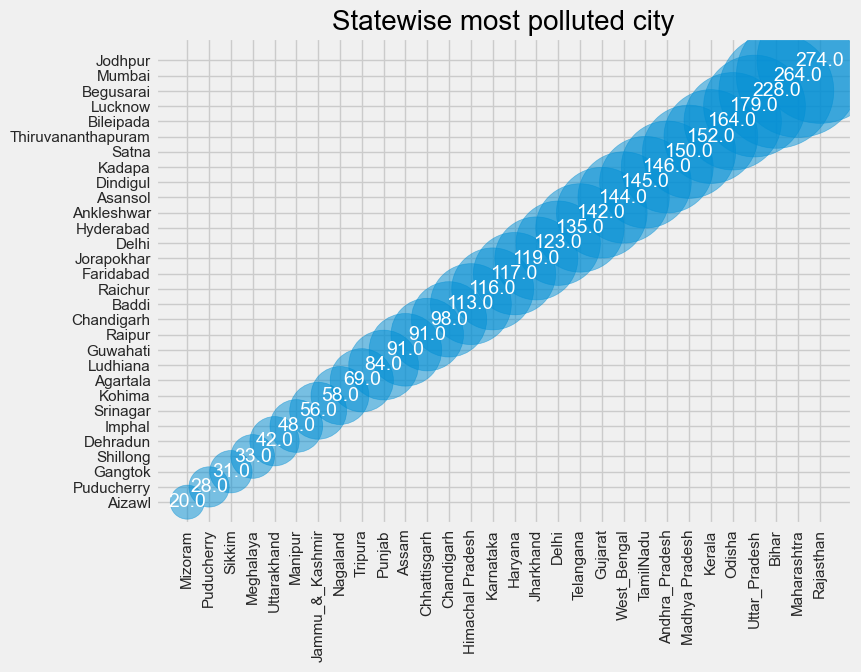

In [269]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(da_sort['state'], da_sort['city'], s=da_sort['pollutant_avg']*30, alpha=0.5)
plt.xticks(rotation=90)

# label the data points
for i in range(len(da_sort)):
    ax.annotate(da_sort['pollutant_avg'][i], (da_sort['state'][i], da_sort['city'][i]), ha='center', va='center')

plt.title(label="Statewise most polluted city",
          fontsize=20,
          color="black")